# 1) Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2) Read Data Set

In [2]:
df=pd.read_csv('SalaryData_train.csv')

In [3]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# 3) EDA

In [4]:
df.shape

(30161, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


### Explore the categorical variable

In [6]:
# find the categorical variable 
categorical=[i for i in df.columns if df[i].dtype=='object']
print('There are {} categorical variable'.format(len(categorical)))
print('The categorical variable are :',categorical)

There are 9 categorical variable
The categorical variable are : ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


### Summary of categorical variables

There are 9 categorical variable
The categorical variables are :
    'workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary'
Salary is the target variable.

### Missing values in categorical variables

In [7]:
df[[i for i in df.columns if df[i].dtype=='object']].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

### Frequency counts of categorical variables

In [8]:
for i in categorical:
    print(df[i].value_counts())

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other

### Frequency distribution of categorical variables¶

In [9]:
for i in categorical:
    print(df[i].value_counts()/np.float(len(df)))

 Private             0.738868
 Self-emp-not-inc    0.082855
 Local-gov           0.068532
 State-gov           0.042406
 Self-emp-inc        0.035609
 Federal-gov         0.031266
 Without-pay         0.000464
Name: workclass, dtype: float64
 HS-grad         0.326249
 Some-college    0.221379
 Bachelors       0.167236
 Masters         0.053944
 Assoc-voc       0.043334
 11th            0.034747
 Assoc-acdm      0.033421
 10th            0.027187
 7th-8th         0.018468
 Prof-school     0.017970
 9th             0.015086
 12th            0.012500
 Doctorate       0.012433
 5th-6th         0.009549
 1st-4th         0.005006
 Preschool       0.001492
Name: education, dtype: float64
 Married-civ-spouse       0.466331
 Never-married            0.322436
 Divorced                 0.139717
 Separated                0.031133
 Widowed                  0.027420
 Married-spouse-absent    0.012267
 Married-AF-spouse        0.000696
Name: maritalstatus, dtype: float64
 Prof-specialty       0.13388

In [10]:
for i in categorical:
    print(df[i].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']
[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
 ' Poland' ' Colu

### Number of labels: cardinality

In [11]:
for i in categorical:
    print('There are',len(df[i].unique()),'No.of labels in',i)

There are 7 No.of labels in workclass
There are 16 No.of labels in education
There are 7 No.of labels in maritalstatus
There are 14 No.of labels in occupation
There are 6 No.of labels in relationship
There are 5 No.of labels in race
There are 2 No.of labels in sex
There are 40 No.of labels in native
There are 2 No.of labels in Salary


## Explore Numerical Variables

In [12]:
numeric=[i for i in df.columns if df[i].dtype=='int64']
print('There are',format(len(numeric)),'numerical columns' )
print('The numerical variables are:',numeric)

There are 5 numerical columns
The numerical variables are: ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [13]:
df[numeric].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [14]:
# Summary of numerical variables
# There are 5 numerical columns
# The numerical variables are: ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']
# All of the numerical variables are of discrete data type.

### Missing values in numerical variables

In [15]:
df[numeric].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

# 4) Declare feature vector and target variable

In [16]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
x=df.drop(['Salary'],axis=1)
y=df['Salary']

 # 5) Split data into separate training and test set 

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [20]:
xtrain.shape,xtest.shape

((21112, 13), (9049, 13))

# 6) Feature Engineering 

In [21]:
xtrain.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
dtype: object

In [22]:
x_categorical=[col for col in xtrain.columns if xtrain[col].dtype=='object']
x_categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [23]:
x_numerical=[col for col in xtrain.columns if xtrain[col].dtype=='int64']
x_numerical

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [24]:
xtrain[x_categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [25]:
xtrain[x_numerical].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

In [26]:
xtrain.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

In [27]:
xtest.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

# Encode categorical variables¶

In [28]:
pip install --upgrade category_encoders

Note: you may need to restart the kernel to use updated packages.


In [29]:
import category_encoders as ce

In [30]:
encoder=ce.OneHotEncoder(cols=['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native'])
xtrain=encoder.fit_transform(xtrain)
xtest=encoder.transform(xtest)

In [31]:
xtrain.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
18059,46,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
17866,64,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9208,47,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25495,34,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17392,22,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
xtrain.shape

(21112, 102)

In [33]:
xtest

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
14791,24,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6454,45,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8534,26,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14317,20,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26509,40,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28586,38,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22684,51,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13362,51,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,19,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 7) Feature Scaling 

In [34]:
clos=xtrain.columns

In [35]:
from sklearn.preprocessing import RobustScaler

In [36]:

scalar=RobustScaler()
xtrain=scalar.fit_transform(xtrain)

In [37]:
xtrain

array([[ 0.47368421,  1.        , -1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.42105263,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.52631579,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.05263158,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.26315789,  0.        , -1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.42105263,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [38]:
xtest=scalar.transform(xtest)

In [39]:

xtest

array([[-0.68421053,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.42105263,  0.        , -1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.57894737,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.73684211,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.94736842,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.94736842,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [41]:
xtrain=pd.DataFrame(xtrain,columns=clos)

In [42]:
xtrain

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,0.473684,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.421053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.526316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.157895,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.789474,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21107,-0.684211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21108,-0.947368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21109,-1.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21110,0.263158,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
xtest=pd.DataFrame(xtest,columns=clos)

In [44]:
xtest

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,-0.684211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.421053,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.578947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.894737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.157895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9044,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9045,0.736842,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9046,0.736842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9047,-0.947368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 8) Model training

In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
gn=GaussianNB()
gn.fit(xtrain,ytrain)

GaussianNB()

# 9) Predict the results 

In [47]:
ypred=gn.predict(xtest)
ypred

array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

# 10) Check accuracy score 

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
print('Accuracy Score:',format(accuracy_score(ytest,ypred)))

Accuracy Score: 0.7996463697646149


### Compare the train-set and test-set accuracy

In [50]:
ypred_train=gn.predict(xtrain)
ypred_train

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [51]:
print('Trainning Accuracy Score:',format(accuracy_score(ytrain,ypred_train)))

Trainning Accuracy Score: 0.7996400151572566


### Check for overfitting and underfitting

In [56]:
print('Training set score:',format(gn.score(xtrain,ytrain)))
print('Testing set score:',format(gn.score(xtest,ytest)))

Training set score: 0.7996400151572566
Testing set score: 0.7996463697646149


In [57]:
# There is no overfitting or underfitting problem

### Compare model accuracy with null accuracy

In [58]:
# check class distribution in test set
ytest.value_counts()

 <=50K    6754
 >50K     2295
Name: Salary, dtype: int64

In [59]:
# check null accuracy score
null_accuracy=6754/(6754+2295)
print('Null Accuracy:',format(null_accuracy))

Null Accuracy: 0.7463808155597303


In [60]:
## We can see that our model accuracy score is 0.79964 but null accuracy score is 0.74638. 
## So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job 
## in predicting the class labels.

# 11) Confusion matrix 

In [62]:
from sklearn.metrics import confusion_matrix

In [68]:
cm=confusion_matrix(ytest,ypred)
print('confusion metrix:\n',cm)
print('True Positive:',cm[0,0])
print('True Negative:',cm[1,1])
print('False Positive:',cm[0,1])
print('False Negative:',cm[1,0])


confusion metrix:
 [[5377 1377]
 [ 436 1859]]
True Positive: 5377
True Negative: 1859
False Positive: 1377
False Negative: 436


<AxesSubplot:>

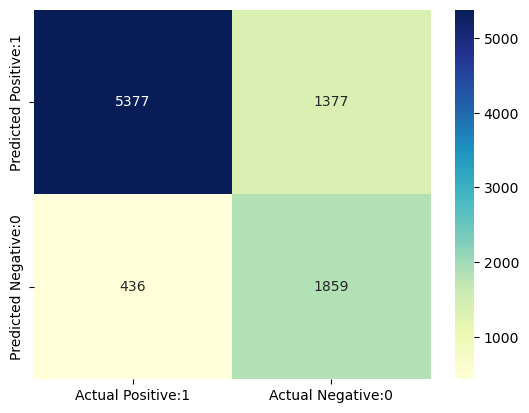

In [71]:
# visualize confusion matrix with seaborn heatmap

cm_matrix=pd.DataFrame(data=cm,columns=['Actual Positive:1','Actual Negative:0'],
                                        index=['Predicted Positive:1','Predicted Negative:0'])
sns.heatmap(cm_matrix,annot=True,fmt='d',cmap='YlGnBu')

# 12) Classification metrices 

In [73]:
from sklearn.metrics import classification_report

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

       <=50K       0.92      0.80      0.86      6754
        >50K       0.57      0.81      0.67      2295

    accuracy                           0.80      9049
   macro avg       0.75      0.80      0.76      9049
weighted avg       0.84      0.80      0.81      9049



In [74]:
### Classification accuracy

TP=cm[0,0]
TN=cm[1,1]
FP=cm[0,1]
FN=cm[1,0]

In [75]:
print('Classification accuracy:',(TP+TN)/(TP+TN+FP+FN))

Classification accuracy: 0.7996463697646149


In [76]:
## Classification error

print('Classification error:',(FP+FN)/(TP+TN+FP+FN))

Classification error: 0.20035363023538513


In [77]:
## precision score
print('precision score:',TP/(TP+FP))

precision score: 0.7961208172934557


In [78]:
## Recall score

print('Recall score:',TP/(TP+FN))

Recall score: 0.9249956992946843


In [79]:
# True Positive Rate
print('True Positive Rate:',TP/(TP+FN))

Recall score: 0.9249956992946843


In [81]:
# False Positive Rate
print('False Positive Rate:',FP/(FP+TN))

False Positive Rate: 0.42552533992583436


In [82]:
# Specificity
print('Specificity:',TN/(TN+FP))

Specificity: 0.5744746600741656


# 13) Calculate class probabilities

In [83]:
# print the first 10 predicted probabilities of two classes- 0 and 1

ypred_prob=gn.predict_proba(xtest)[0:10]
ypred_prob

array([[8.38785053e-01, 1.61214947e-01],
       [1.76231741e-02, 9.82376826e-01],
       [9.99999995e-01, 4.50731990e-09],
       [9.99999783e-01, 2.17026614e-07],
       [9.99755173e-01, 2.44826961e-04],
       [2.99959761e-01, 7.00040239e-01],
       [1.22704235e-11, 1.00000000e+00],
       [9.85777234e-01, 1.42227660e-02],
       [9.80807032e-01, 1.91929685e-02],
       [9.99509218e-01, 4.90782417e-04]])

In [84]:
# store the probabilities in dataframe

ypred_prob_df=pd.DataFrame(data=ypred_prob,columns=['probability<=50k','probability >50k'])
ypred_prob_df

,probability<=50k,probability >50k
0,8.387851e-01,1.612149e-01
1,1.762317e-02,9.823768e-01
2,1.000000e+00,4.507320e-09
3,9.999998e-01,2.170266e-07
4,9.997552e-01,2.448270e-04
5,2.999598e-01,7.000402e-01
6,1.227042e-11,1.000000e+00
7,9.857772e-01,1.422277e-02
8,9.808070e-01,1.919297e-02
9,9.995092e-01,4.907824e-04


In [85]:
# store the predicted probabilities for class 1 - Probability of >50K

ypred_1=gn.predict_proba(xtest)[:,1]

In [93]:
ypred_1

array([1.61214947e-01, 9.82376826e-01, 4.50731990e-09, ...,
       2.89791171e-05, 2.43529673e-04, 7.04399295e-10])

Text(0, 0.5, 'Frequency')

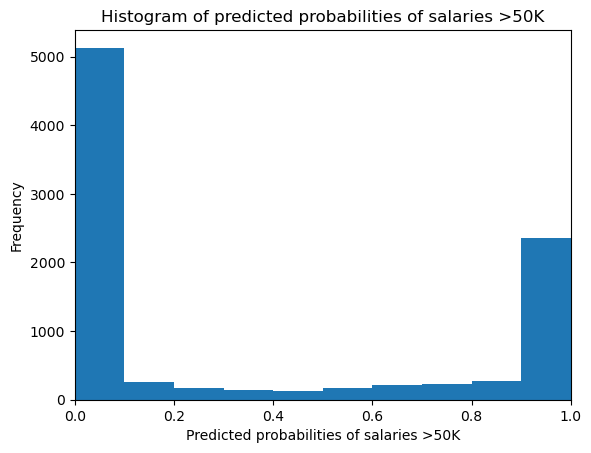

In [86]:
# plot histogram of predicted probabilities


plt.hist(ypred_1,bins=10)
plt.title('Histogram of predicted probabilities of salaries >50K')
plt.xlim(0,1)
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

In [87]:
## We can see that the above histogram is highly positive skewed.
## There are relatively small number of observations with probability > 0.5.

# 14)  ROC - AUC 

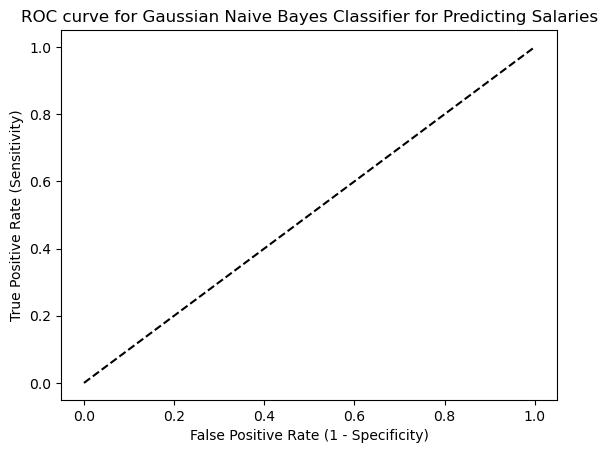

In [96]:
## ROC curve

from sklearn.metrics import roc_curve

fpr,tpr,thrshold=roc_curve(ytest,ypred_1,pos_label='>50k')

plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1] ,[0,1], 'k--')

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [97]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC=roc_auc_score(ytest,ypred_1)

In [98]:
ROC_AUC

0.8896892215248222

In [99]:
## ROC AUC of our model approaches towards 1.
## So, we can conclude that our classifier does a good job in prediction.

# 15) k-Fold Cross Validation

In [101]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(gn,xtrain,ytrain,cv=10,scoring='accuracy')
score

array([0.7907197 , 0.79450758, 0.81430602, 0.7825675 , 0.79156798,
       0.79819991, 0.80151587, 0.79677878, 0.80483183, 0.81620085])

In [102]:
# compute Average cross-validation score
score.mean()

0.7991196007923863

In [103]:
# Using the mean cross-validation, we can conclude that we expect the model to be around 79.91% accurate on average.



# 16) Results and conclusion 


### * In this project, I build a Gaussian Naïve Bayes Classifier model to predict whether a person makes over 50K a year.
### * The model yields a very good performance as indicated by the model accuracy which was found to be 80%.
### * Our original model accuracy is 79.96%, but the mean cross-validation accuracy is 79.91%
###     So, the 10-fold cross-validation accuracy does not result in performance improvement for this model.


